# Data StoryTelling

## Proyecto Agua Limpia SA

### Descripcion del cliente
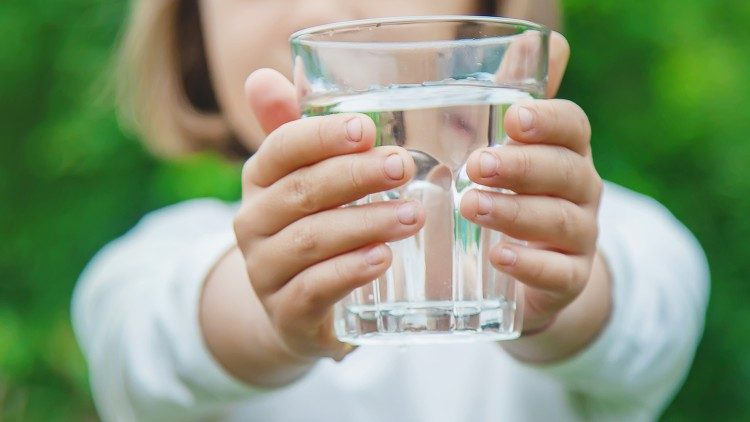

**Agua Limpia** es una empresa que tiene un compromiso con la búsqueda de nuevos recursos de agua potable para el consumo humano. Para esto realiza estudios buscando recursos hídricos, una vez detectado pasa a un análisis del agua para determinar si es potable o no. De esta forma la empresa tiene una mision alineada, con una de las próximas problemáticas que va a tener la humanidad, que es la falta de agua potable para el consumo humano.

La empresa cuenta con dos equipos técnicos enfocados en las dos partes fundamentales de su operación, uno en la búsqueda de recursos y otro en el análisis de los mismos.

### Descripcion del objetivo a resolver

Tomando en cuenta lo siguiente, la empresa quiere automatizar una parte del proceso de análisis de los recursos a fin de poder destinar más recursos humanos a la búsqueda de recurso hídricos. Con este fin la dirección de la empresa nos solicita la investigacion para generar un modelo de machine learning, con el cual poder determinar de forma automática si una muestra es apta o no para el consumo humano.

Entre los beneficios que obtendrá la empresa, además de acelerar el análisis de las muestras es que el equipo de análisis actualmente está formado por 5 bioquímicos, pasaría a estar formado por solo dos, pasando 3 al equipo de búsqueda de recursos.

El objetivo es que estos dos bioquímicos, pasen al modelo las muesttras y el mismo le entregue lo resultados, ellos solo verificarían que los resultados arrojados por el modelo sean óptimos, reduciendo de esta forma de manera significativa la carga de trabajo.

Con este objetivo el equipo de bioquímicos nos entregó un dataset a fin de ver la viabilidad del proyecto y poder presentarlo tanto al equipo técnico como a la dirección de la empresa. El dataset los subimos a GitHub con fines practicos:

https://raw.githubusercontent.com/macondo-ti/DATASETS/main/Water_quality.csv

### Dataset agua potable

* Importamos el dataset y vemos que sus dimensiones son (7996, 21)
* La variable target es is_safe basicamente es un booleano 1 es potable para consumo humano, 0 no lo es
* Las variable del dataset son todas, del tipo flotante (el equipo tecnico nos arrojo ciertos criterios para las variables):

1. aluminium: Peligroso si es superior a 2.8
2. ammonia: Peligroso si es superior a 32.5
3. arsenic: Peligroso si es superior a 0.01
4. barium: Peligroso si es mayor que 2
5. cadmium: Peligroso si es superior a 0.005
6. chloramine: Peligrosa si es mayor de 4
7. chromium: Peligroso si es superior a 0.1
8. copper: Peligroso si es superior a 1.3
9. flouride: Peligroso si es superior a 1.5
10. bacteria: Peligrosas si es mayor que 0
11. viruses: Peligroso si es mayor que 0
12. lead: Peligroso si es mayor que 0.015
13. nitrates: Peligrosos si son mayores de 10
14. nitrites: Peligroso si es mayor que 1
15. mercury: Peligroso si es mayor que 0.002
16. perchlorate: Peligroso si es superior a 56
17. radium: Peligroso si es mayor que 5
18. selenium: Peligroso si es superior a 0,5
19. silver: Peligroso si es mayor que 0.1
20. uranium: Peligroso si es superior a 0,3

## Importamos las librerias a utilizar

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df_water=pd.read_csv('https://raw.githubusercontent.com/macondo-ti/DATASETS/main/Water_quality.csv')

## Importamos el Dataset, y le hacemos un breve analisis

In [4]:
df_water

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7992,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7993,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7994,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [5]:
df_water.shape

(7996, 21)

Contamos con 21 variables y 7995 registros

In [6]:
df_water.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

In [7]:
df_water.dtypes

aluminium      float64
ammonia        float64
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe          int64
dtype: object

Todas las variables  tiene el tipo de dato que les corresponde

In [8]:
df_water.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

No contamos con datos nulos, algo fundamental para continuar con el analisis

In [9]:
df_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7996 entries, 0 to 7995
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

### Conclusiones iniciales del Dataset

* En un análisis básico inicial, podemos determinar que no tenemos valores null o a priori con errores.
* Las variables predictoras en principio tienen el tipo correcto (flotante) el cual nos es bastante óptimo para el desarrollo de un modelo
* El target es claro, un simple 0 no potable, 1 potable, valores booleanos son ideales como target para los modelos

A simple vista es prometedor el dataset para los que nos solicita el cliente, tenemos una buena cantidad de registros (7996) y una buena cantidad para seleccionar las variables predictoras (21)

## Primeras preguntas a resolver

* En una primera instancia ¿es viable lo que nos solicita el cliente?

* El Dataset que nos proporciona, ¿puede realmente ayudarnos a responder la pregunta si una muestra es potable o no?

* En caso de poder avanzar con lo que nos solicitan, ¿qué variables se utilizarían para poder predecir el target? Con estas variables nos alcanza para obtener un resultado optimo o debemos solicitar mas datos (variables) o más muestras (registros)

* Dentro del machine learning, ¿que tipo de problema seria, cuales serian los primeros modelos a probar para llegar al target?

* A grandes rasgos, podemos tratar de predecir, si los costos del desarrollo del proyecto y su posterior puesta en marcha y mantenimiento, ¿son inferiores a los beneficios que obtendría la empresa?

Podemos ver la importancia en la busqueda de nuevos recursos, ya que la mayoria de las muestras no son potables

## Analisis EDA

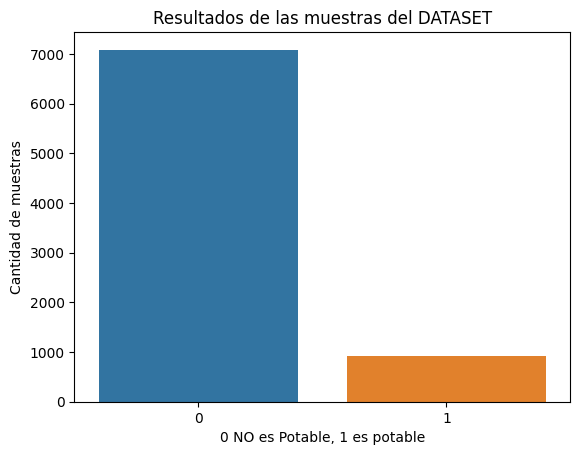

In [10]:
sns.countplot(x='is_safe', data=df_water)
plt.title('Resultados de las muestras del DATASET')
plt.xlabel('0 NO es Potable, 1 es potable')
plt.ylabel('Cantidad de muestras')
plt.show()

In [11]:
df_water.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


### Analisis UNIVARIADO

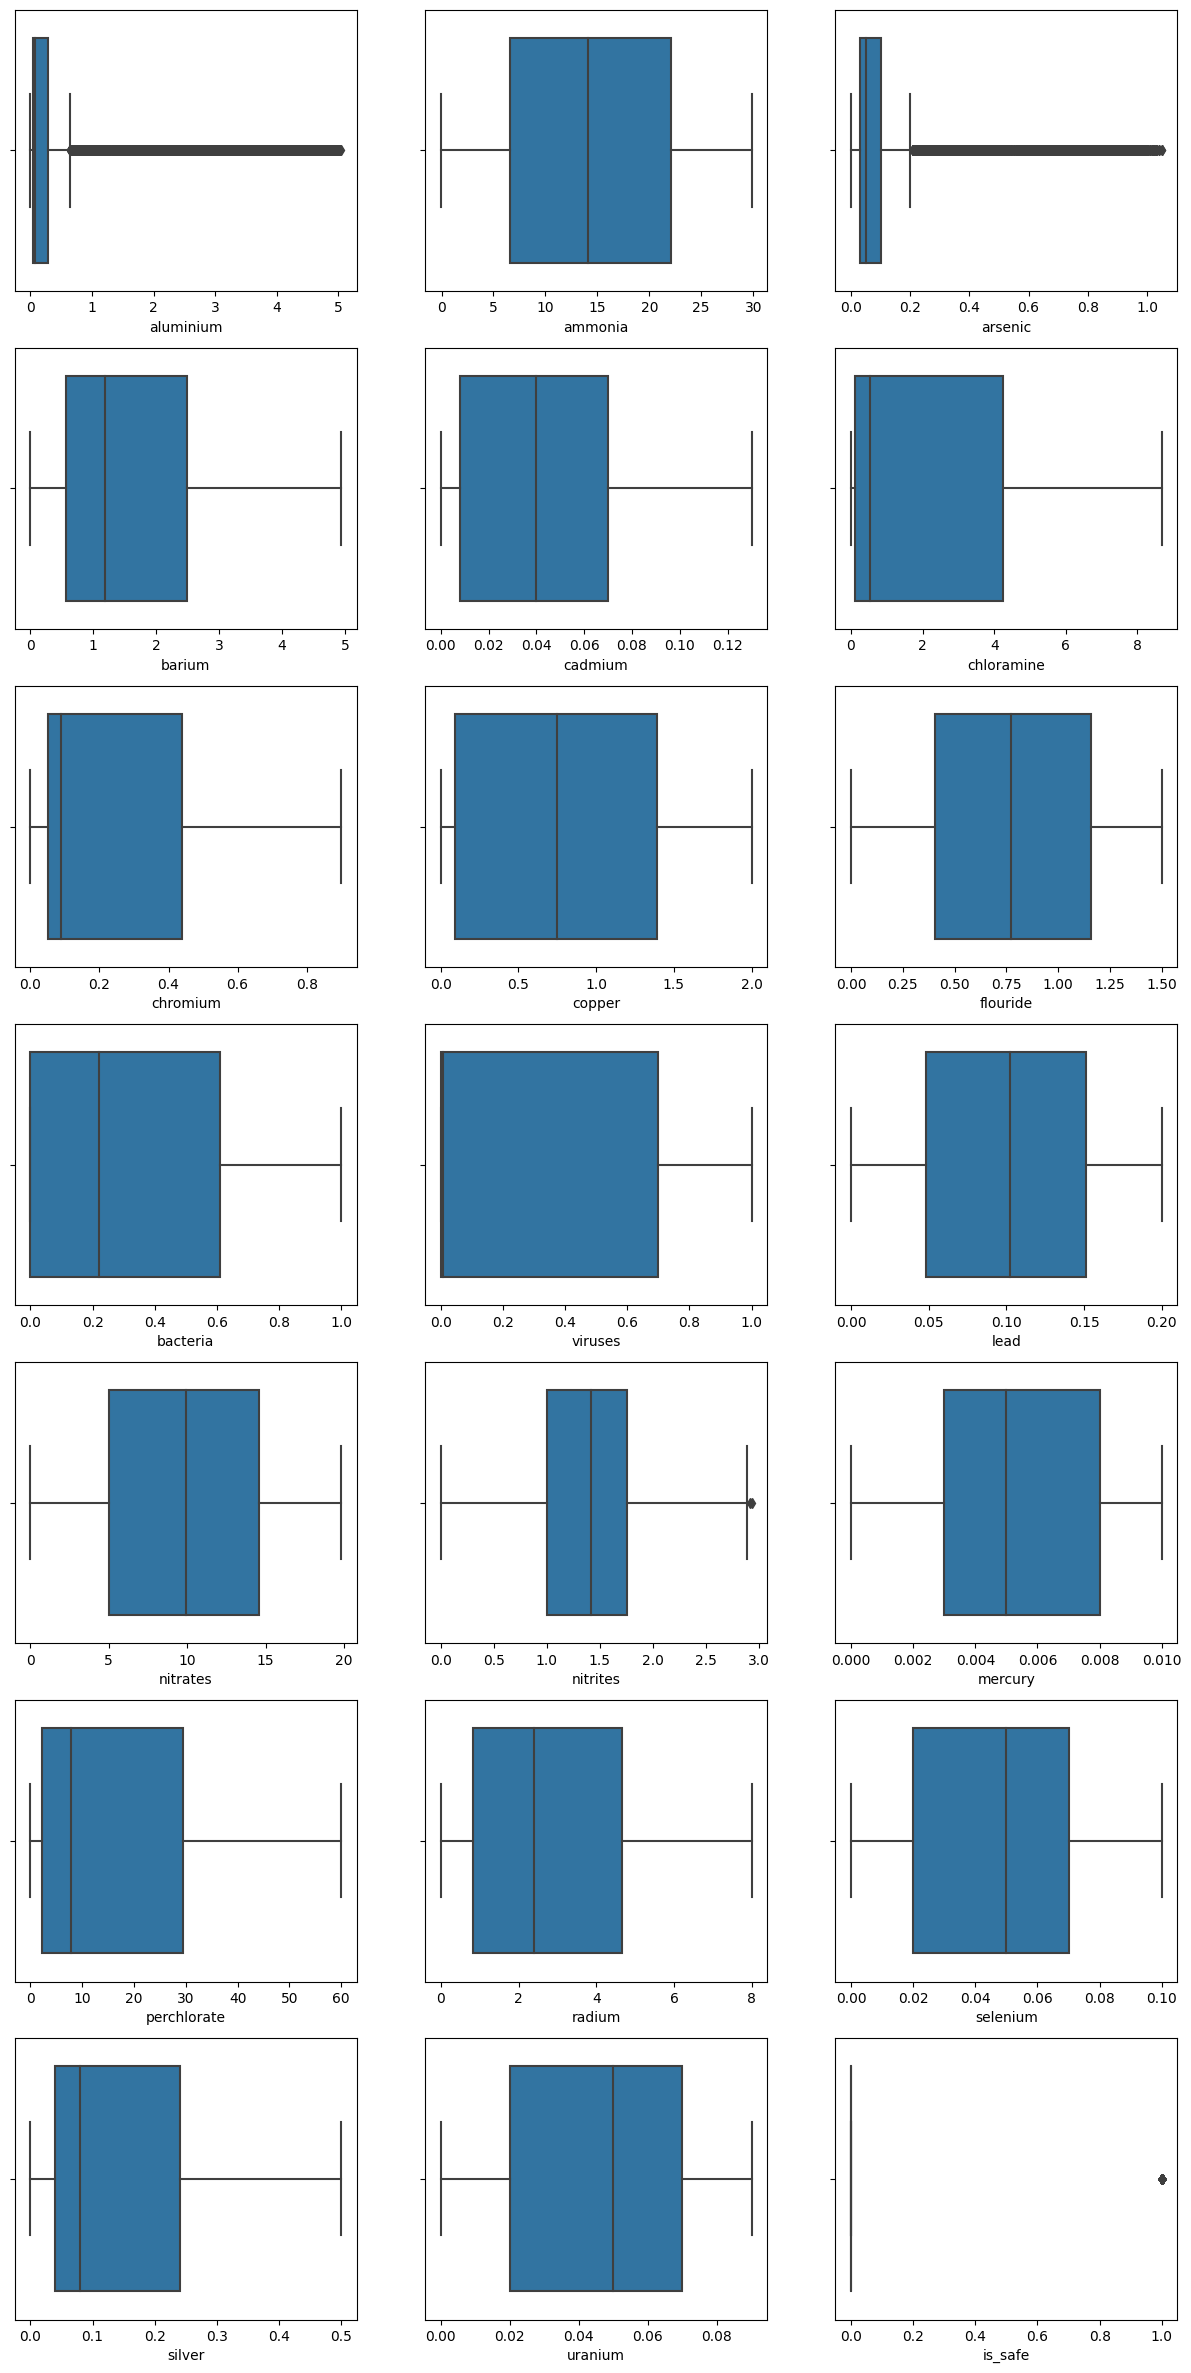

In [12]:
fig, axs = plt.subplots(ncols=3, nrows=7, figsize=(15, 30))
for i, column in enumerate(df_water.columns):
    sns.boxplot(x=df_water[column], ax=axs[i//3][i%3])

Quitando dos variables puntuales aluminium, arsenic y nitrites en menor medida, el resto no tiene oulier.

Revisamos mas en detalle las dos variables que tienen mas correlacion con el target:

<Axes: xlabel='chloramine', ylabel='Count'>

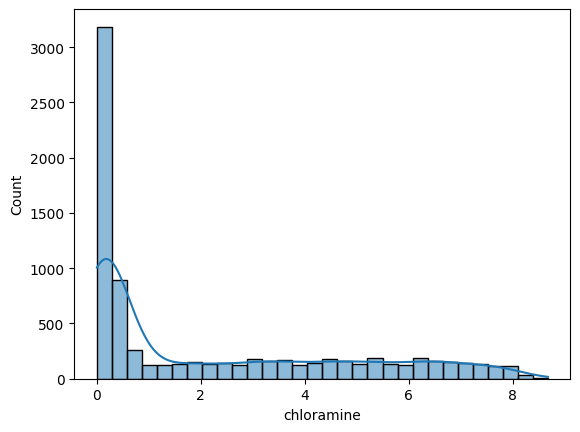

In [13]:
sns.histplot(data=df_water, x='chloramine', kde=True, bins=30)

In [14]:
df_water.chloramine.describe()

count    7996.000000
mean        2.177589
std         2.567210
min         0.000000
25%         0.100000
50%         0.530000
75%         4.240000
max         8.680000
Name: chloramine, dtype: float64

<Axes: xlabel='chromium', ylabel='Count'>

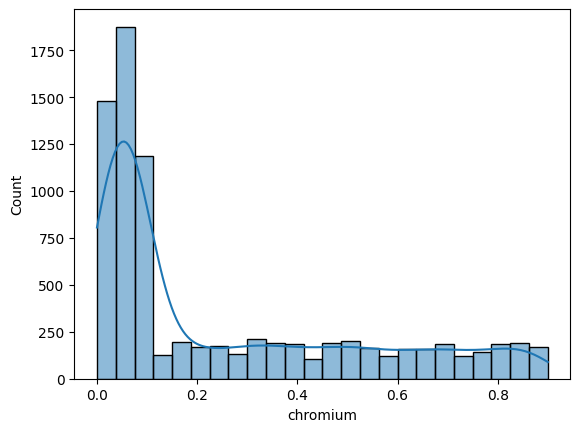

In [15]:
sns.histplot(data=df_water, x='chromium', kde=True)

In [16]:
df_water.chromium.describe()

count    7996.000000
mean        0.247300
std         0.270663
min         0.000000
25%         0.050000
50%         0.090000
75%         0.440000
max         0.900000
Name: chromium, dtype: float64

<Axes: xlabel='cadmium', ylabel='Count'>

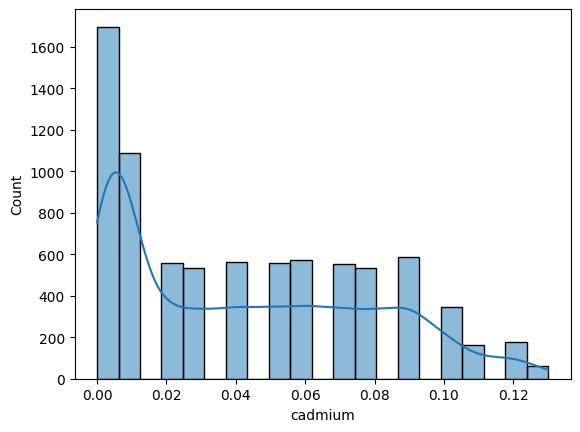

In [17]:
sns.histplot(data=df_water, x='cadmium', kde=True)

In [18]:
df_water.cadmium.describe()

count    7996.000000
mean        0.042803
std         0.036049
min         0.000000
25%         0.008000
50%         0.040000
75%         0.070000
max         0.130000
Name: cadmium, dtype: float64

### Analisis BIVARIADO

#### Matriz de Correlacion

Se torna mas que interesante, analizar la correlacion de las variables respecto al target, no nos importa tanto si la misma es negativa o postiva, si que sea alejada del 0, igualmente debemos recordar que correlacion no es causalidad siempre.

In [19]:
cols_df_water=['ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 'viruses',
               'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium', 'is_safe']

df_water_corr=df_water.loc[:,cols_df_water]
water_corr=df_water_corr.corr()
water_corr['is_safe'].sort_values(ascending=False)

is_safe        1.000000
chloramine     0.186704
chromium       0.182306
silver         0.102813
barium         0.090858
perchlorate    0.075735
radium         0.064743
nitrites       0.046986
copper         0.029498
flouride       0.006550
lead          -0.009970
bacteria      -0.022077
ammonia       -0.022919
selenium      -0.030923
mercury       -0.036817
nitrates      -0.072100
uranium       -0.075619
viruses       -0.097040
arsenic       -0.123362
cadmium       -0.256034
Name: is_safe, dtype: float64

<ipython-input-20-992d35dce9bd>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(water_corr, dtype=np.bool)


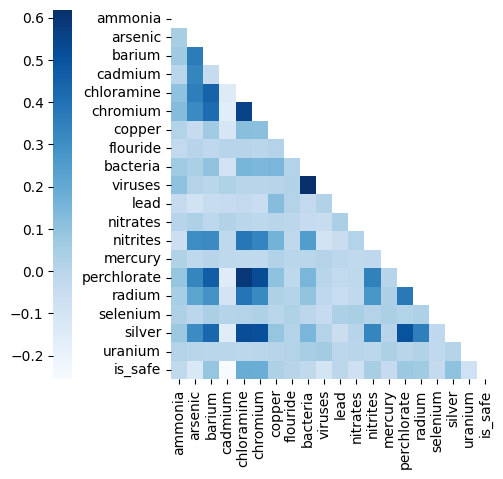

In [20]:
mask = np.zeros_like(water_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(water_corr, cmap="Blues", annot=False, mask=mask, cbar_kws={"location": "left", "pad": 0.2})

plt.savefig("corr.png", transparent=True)

Encontramos zonas oscuras mas que interesantes para encontrar correlaciones, las mas claras son correlaciones negativas, la mismas a difrencia de las positivas solo pueden llegar poco mas del 20%

A continuacion podemos ver los valores de todas las correlaciones sobre el target ordenados, en este caso nos interesan los primeros (mayor correlacion positiva) y los ultimos (mayor correlacion negativa)

Nos encontramos con la sorpresa, que la que mayor correlacion, la tiene cadmium con un -0.25

Usando un grafico de puntos, analisamos un poco las la relacion de las 4 variables que mas correlacion tiene con el target

<Axes: xlabel='chloramine', ylabel='is_safe'>

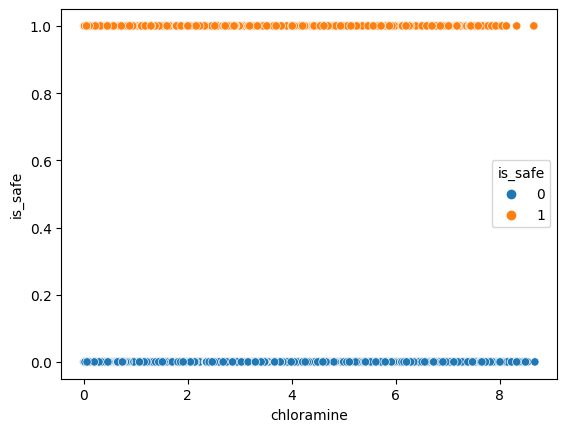

In [21]:
sns.scatterplot(x='chloramine', y='is_safe', hue='is_safe', data=df_water)

<Axes: xlabel='arsenic', ylabel='is_safe'>

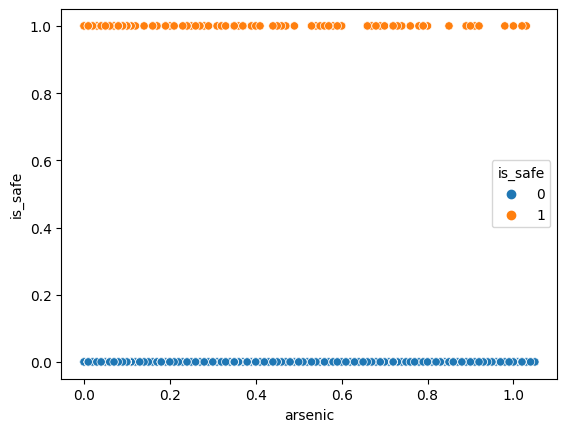

In [22]:
sns.scatterplot(x='arsenic', y='is_safe', hue='is_safe', data=df_water)

<Axes: xlabel='chromium', ylabel='is_safe'>

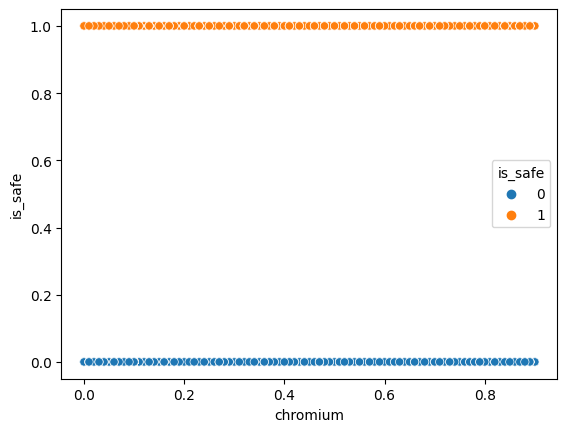

In [23]:
sns.scatterplot(x='chromium', y='is_safe', hue='is_safe', data=df_water)

<Axes: xlabel='cadmium', ylabel='is_safe'>

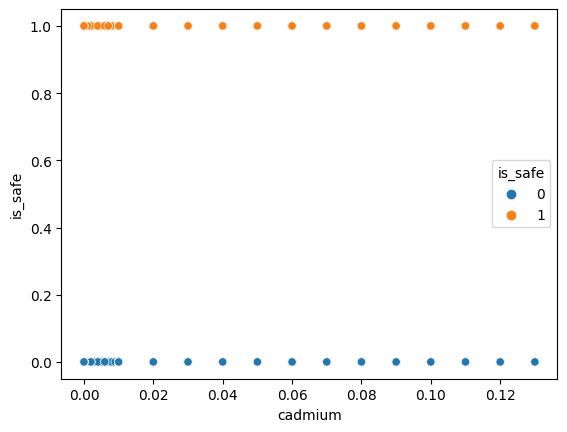

In [24]:
sns.scatterplot(x='cadmium', y='is_safe', hue='is_safe', data=df_water)

#### Correlacion entre Variables Predictoras

Graficamos las relaciones entre algunas variables que tenian una correlacion importante entre si, a fin de ver si podemos descartar alguna pensando en simplificar el modelo

Como podemos concluir, eliminar algunas de estas variables no podria quitar informacion estadistica importante para conseguir el target.

<Axes: xlabel='chloramine', ylabel='chromium'>

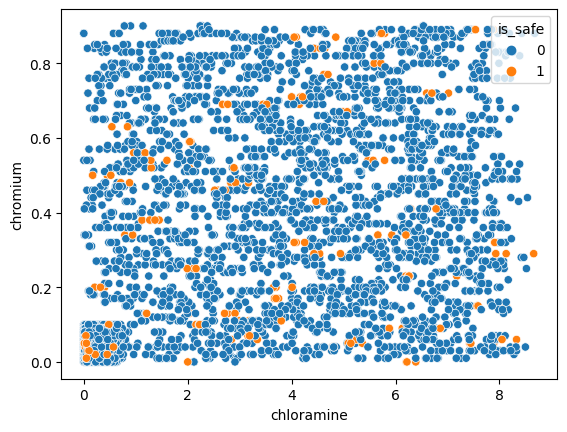

In [26]:
sns.scatterplot(x='chloramine', y='chromium', hue='is_safe', data=df_water)

<Axes: xlabel='silver', ylabel='chromium'>

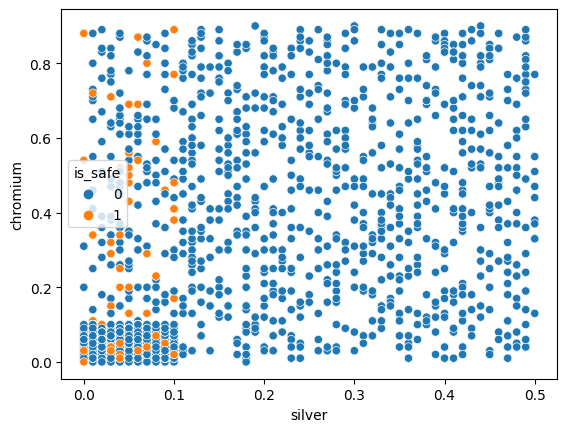

In [29]:
sns.scatterplot(x='silver', y='chromium', hue='is_safe', data=df_water)

<Axes: xlabel='silver', ylabel='perchlorate'>

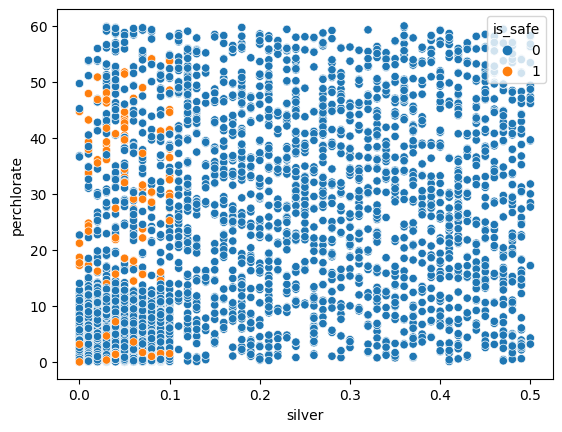

In [30]:
sns.scatterplot(x='silver', y='perchlorate', hue='is_safe', data=df_water)

<Axes: xlabel='barium', ylabel='perchlorate'>

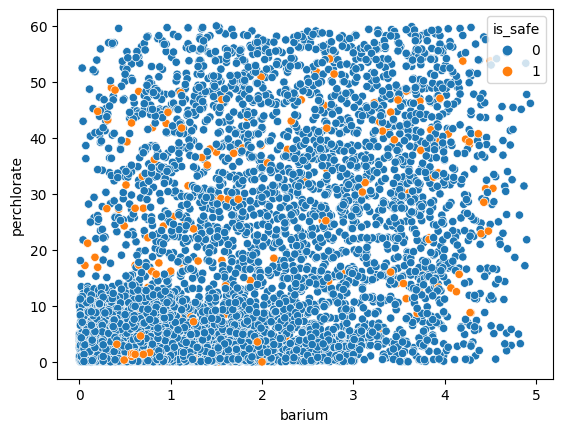

In [31]:
sns.scatterplot(x='barium', y='perchlorate', hue='is_safe', data=df_water)

### Primeras conclusiones y respuestas:

* Seria beneficioso para la organización poder automatizar parte del proceso de análisis de las muestras para poder reasignar mas recursos humanos a la búsqueda de nuevas fuentes de agua (debemos pensar que los colaboradores son bioquimicos, con años de experiencia en una industria en particular)

    Mas peso, cobra, al ver el dataset, y notar las pocas muestras en proporcion que si son aptas para el consumo humano, por lo cual toma mayor peso destinar recursos de la organizacion a la busqueda de nuevas fuentes de aguas potables


* En principio podemos pensar en base a la cantidad de variables que si, realizando un análisis a la correlación de las variables respecto al target, notamos una baja correlación, notando que las variables con mayor correlación son:

    -cadmium       -0.256034

    -chloramine 	0.186704

    -chromium	    0.182306

    -arsenic       -0.123362

    -silver         0.102813

    Encontramos muchos outliers en las variables aluminium y arsenic, en menor medida en nitrites, las mismas en un primer intento se van a descartar del modelo y en caso de no obtener buenos resultados sin ellas, se volveran a evaluar con el equipo operativo de la empresa


* El problema que nos presenta el cliente es del tipo clasificacion, basicamente en base a las variables seleccionadas el modelo nos tiene que arrojar 1 (es potable) o 0 (no es potable)

    Tomando en cuenta el dataset se usaria un modelo del tipo supervisado, en principio se empezaria a probar con los siguientes modelos:

    1- Albol de decisiones

    2- Regresion Logistica

    Los primeros intentos seran con Arboles de decisiones, ya que en caso de darnos buenos resultados, sera de muy facil entendimietnto para el cliente como llega a los resultados, ademas de una mayor facilidad para la persona que verifica en que casos el modelo no tiene el mejor rendimiento.

    Para esto, tomando en cuenta las dificultades que tiene con variables con alto outlier, las mismas fueron ya descartadas, en caso de no tener buenos resultados se experimentaria con la regresion lineal

## Feature Selection

En principio eliminamos las variable que tienen Outliers (aluminium, arsenic y nitrites)

In [ ]:
train_cols=['ammonia', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 'viruses',
               'lead', 'nitrates', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium']

x = df_water[train_cols]
y = df_water['is_safe']

Separamos parte del dataset para poder probar el modelo despues del entrenamiento

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y)

In [ ]:
X_train.shape

(5997, 17)

#### Conclusiones

Podemos ver como pasamos de 7996 instancias a 5997 y de 20 variables predictorias a 17, nos quedan para testear el modelo 1999 instancias, no encontre el parametro para poder forzar que mantenga la proporcion de la muestra, ya que el 10% aproximadamente de las muestras son potables

No seguimos quitando variables, ya que la cantidad de variable que quedo es baja y no tiene sentido perder data estadistica

## Seleccion del modelo

Con el fin de saber que modelo nos da mayor performance, importamos la funcion cross_val_score, la cual nos permite dividir en tres partes el dataset, de esta forma combinando las partes resultantes a cada modelo elegido le vamos a dar 3 datasets distintos y 3 testeos distintos, de la media de estos tres accuracy (métrica para los resultados predictivos de un modelo) resultantes, vamos a poder seleccionar al que tenga mayor valor

Vamos a testear los modelos:

* Regresion Logistica
* Arbol de desiciones
* KNN

In [ ]:
modelo1 = LogisticRegression(max_iter = 5000)
modelo2 = DecisionTreeClassifier()
modelo3 = KNeighborsClassifier(5)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(modelo1, X_train, Y_train, cv=3).mean()

0.8822744705686176

In [ ]:
cross_val_score(modelo2, X_train, Y_train, cv=3).mean()

0.8799399699849925

In [ ]:
cross_val_score(modelo3, X_train, Y_train, cv=3).mean()

0.8682674670668669

#### Conclusiones

El modelo1, es una regresion logistica, y el el que mejor resultado nos da, por unas centecimas de puntos porcentual arroja mejores resultados que el modelo 2 que es un arbol de decisiones, el que peor rendimiento nos da es KNN

## Entrenamos y testeamos el modelo logistico

In [ ]:
modelolr = LogisticRegression(max_iter = 5000)

In [ ]:
modelolr.fit(X_train,Y_train)

LogisticRegression(max_iter=5000)

Testeamos con las muestras que no usamos en el entrenamiento

In [ ]:
ypred=modelolr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

Al ser un modelo de clasificacion usamos el accuracy como metrica de su efectividad

In [ ]:
accuracy_score(ypred, Y_test)

0.8914457228614308

In [ ]:
from sklearn.metrics import confusion_matrix

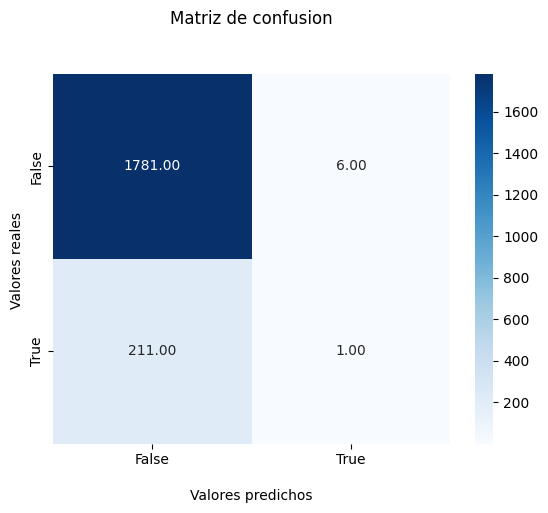

In [ ]:
cf_matrix = confusion_matrix(Y_test, ypred)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt=".2f")
ax.set_title('Matriz de confusion\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

### Conclusiones

Podemos ver que el modelo de la regresion logistica, tiene una prediccion aceptable del 87% en el test con las muestras fuera del entrenamiento

Analizando la matriz de confusion, podemos ver que que los falsos positivos son pocos, pero debido a ser un tema de salud, se debe recalcar al cliente que debe mantener un control humano sobre lo que arroja el modelo.

Pero gracias a la automatizacion puede destinar mas personas a la busqueda de nuevos recursos hidricos

## APIs

### Objetivo

El equipo nos comenta que existe una correlacion entre la calidad del aire de una zona y la potabilidad del agua de la misma, entonces a fines de ir analizando si el agua de una zona puede llegar a dejar de ser potable nos vamos a conectar a la API de OpenWeather para que ellos tengan el historial de la calidad del aire y de esta forma determinar si es necesario o no volver a analizar el agua.

### Librerias a utilizar

In [ ]:
import requests
import json
from datetime import datetime, date

### Consulta a la API

Nos registramos en el sitio https://openweathermap.org/, el cual nos asigna un key para realizar las consultas, unos de los requerimiento para consultar la calidad del aires es pasar la latitud y longitud del sitio (existen otros metodos pero es menos preciso en la respuesta)

Por suerte la misma pagina tambien cuenta con otra API que pasando el codigo postal ZIP y el codigo ISO del Pais nos entrega las cordenadas.

Realizamos la consulta a la API y nos guardamos las coordenadas en dos variables lat y lon

Tambien ya guardamos en las variables start y end el rango de fecha a analizar



#### API Coordenadas

* https://openweathermap.org/api/geocoding-api
* https://openweathermap.org/api/air-pollution

In [ ]:
ZipCode = '3600'
CountryCode = 'ar'
start = date(2022, 1, 1)
end = date(2023, 4, 1)
key = '3fa739376c335c28ac5bef6a07b4c32f'
URL_Cord = 'http://api.openweathermap.org/geo/1.0/zip?zip=' + ZipCode + ',' + CountryCode + '&appid=' + key

In [ ]:
API_Cord = requests.get(URL_Cord)
print(API_Cord)

<Response [200]>


In [ ]:
API_Cord.text

'{"zip":"3600","name":"Departamento Formosa","lat":-25.8167,"lon":-58.0667,"country":"AR"}'

In [ ]:
dic_cord = json.loads(API_Cord.text)
lat = str(dic_cord['lat'])
lon = str(dic_cord['lon'])

#### API Registros Calidad del aire

La API nos va a entregar las siguientes variables:

* dt: fecha y hora
* main.aqui: es la calidad del aire, puede tener como valor 1, 2, 3, 4 y 5. Donde uno el aire esta en perfectas condiciones, 3 moderado, 4 ya contaminado y 5 muy contaminado
* components.co: Concentracion de CO (monoxido de carbono), μg/m3
* components.no: Condentracion de NO (monoxido de nitrogeno), μg/m3
* components.no2: Concentracion de NO2 (dioxido de nitrogeno), μg/m3
* components.o3: Concetracion de O3 (Ozono), μg/m3
* components.so2: Concetracion de SO2 (dioxido de sulfato), μg/m3
* components.pm2_5: Concentracion de particulas finas
* components.pm10: Concentracion de particulas gruesas
* components.nh3: Concentracion de NH3 (amoniaco), μg/m3

##### API, para evaluar la calidad del aire

Pasamos a la API las variable que difinimos originalmente, mas las que generamos al consultar en la primer API el codigo postal de una ciudad para que nos de sus coordenadas en longitud y latitud

In [ ]:
start_time = datetime.combine(start, datetime.min.time())
end_time = datetime.combine(end, datetime.min.time())

start_unix = str(int(start_time.timestamp()))
end_unix = str(int(end_time.timestamp()))

Realizamos la solicitud a la API

In [ ]:
URL_Pollution = 'http://api.openweathermap.org/data/2.5/air_pollution/history?lat=' + lat + '&lon=' + lon + '&start=' + start_unix + '&end=' + end_unix + '&appid=' + key
API_Pollution = requests.get(URL_Pollution)
print(API_Pollution)

<Response [200]>


In [ ]:
API_Pollution.text

'{"coord":{"lon":-58.0667,"lat":-25.8167},"list":[{"main":{"aqi":2},"components":{"co":417.23,"no":0,"no2":1.1,"o3":31.11,"so2":0.62,"pm2_5":17.9,"pm10":18.61,"nh3":1.57},"dt":1640995200},{"main":{"aqi":2},"components":{"co":377.18,"no":0,"no2":0.95,"o3":26.82,"so2":0.54,"pm2_5":13.99,"pm10":14.67,"nh3":1.41},"dt":1640998800},{"main":{"aqi":2},"components":{"co":410.56,"no":0,"no2":1.17,"o3":27.18,"so2":0.56,"pm2_5":17.41,"pm10":18.15,"nh3":1.77},"dt":1641002400},{"main":{"aqi":4},"components":{"co":500.68,"no":0,"no2":1.46,"o3":30.04,"so2":0.69,"pm2_5":26.89,"pm10":27.69,"nh3":2.28},"dt":1641006000},{"main":{"aqi":4},"components":{"co":494,"no":0,"no2":1.41,"o3":30.4,"so2":0.67,"pm2_5":26.74,"pm10":27.45,"nh3":2.12},"dt":1641009600},{"main":{"aqi":3},"components":{"co":433.92,"no":0,"no2":1.3,"o3":26.82,"so2":0.62,"pm2_5":21.12,"pm10":21.72,"nh3":1.77},"dt":1641013200},{"main":{"aqi":2},"components":{"co":390.53,"no":0,"no2":1.52,"o3":22.89,"so2":0.59,"pm2_5":17.01,"pm10":17.77,"nh3":

In [ ]:
json_pollution = json.loads(API_Pollution.text)
df_pollution = pd.json_normalize(json_pollution, record_path=['list'], meta=['coord'])
df_pollution

,dt,main.aqi,components.co,components.no,components.no2,components.o3,components.so2,components.pm2_5,components.pm10,components.nh3,coord
0,1640995200,2,417.23,0.00,1.10,31.11,0.62,17.90,18.61,1.57,"{'lon': -58.0667, 'lat': -25.8167}"
1,1640998800,2,377.18,0.00,0.95,26.82,0.54,13.99,14.67,1.41,"{'lon': -58.0667, 'lat': -25.8167}"
2,1641002400,2,410.56,0.00,1.17,27.18,0.56,17.41,18.15,1.77,"{'lon': -58.0667, 'lat': -25.8167}"
3,1641006000,4,500.68,0.00,1.46,30.04,0.69,26.89,27.69,2.28,"{'lon': -58.0667, 'lat': -25.8167}"
4,1641009600,4,494.00,0.00,1.41,30.40,0.67,26.74,27.45,2.12,"{'lon': -58.0667, 'lat': -25.8167}"
...,...,...,...,...,...,...,...,...,...,...,...
10700,1680292800,1,347.14,0.03,0.32,31.83,0.12,5.12,7.47,1.06,"{'lon': -58.0667, 'lat': -25.8167}"
10701,1680296400,1,343.80,0.01,0.47,29.33,0.16,4.69,6.60,1.04,"{'lon': -58.0667, 'lat': -25.8167}"
10702,1680300000,1,343.80,0.00,0.84,28.25,0.31,4.73,6.28,1.11,"{'lon': -58.0667, 'lat': -25.8167}"
10703,1680303600,1,340.46,0.00,1.07,26.11,0.48,4.90,6.06,1.12,"{'lon': -58.0667, 'lat': -25.8167}"


In [ ]:
df_pollution.shape

(10705, 11)

In [ ]:
df_pollution.isnull().sum()

dt                  0
main.aqi            0
components.co       0
components.no       0
components.no2      0
components.o3       0
components.so2      0
components.pm2_5    0
components.pm10     0
components.nh3      0
coord               0
dtype: int64

In [ ]:
df_pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10705 entries, 0 to 10704
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dt                10705 non-null  int64  
 1   main.aqi          10705 non-null  int64  
 2   components.co     10705 non-null  float64
 3   components.no     10705 non-null  float64
 4   components.no2    10705 non-null  float64
 5   components.o3     10705 non-null  float64
 6   components.so2    10705 non-null  float64
 7   components.pm2_5  10705 non-null  float64
 8   components.pm10   10705 non-null  float64
 9   components.nh3    10705 non-null  float64
 10  coord             10705 non-null  object 
dtypes: float64(8), int64(2), object(1)
memory usage: 920.1+ KB


##### Limpieza dataframe

Podemos ver que los datos que nos arroja la API son correctos sin nulos

Pero si encontramos que la variable dt, que es la fecha del registro, esta en formato unix, dificil de entender para un ser humano y el tipo de dato en padas esta en entero.

Por otro lado tenemos al variable coord que no tiene sentido en nuestro caso, ya que repite las coodenadas del la consulta y como en nuestro caso le pedimos solo una ubicacion por consulta, la tenemos que eliminar

Corregimos la variable dt, para que sea mas legible y el tipo de dato correcto

In [ ]:
df_pollution['dt'] = pd.to_datetime(df_pollution['dt'], unit='s')
df_pollution

,dt,main.aqi,components.co,components.no,components.no2,components.o3,components.so2,components.pm2_5,components.pm10,components.nh3,coord
0,2022-01-01 00:00:00,2,417.23,0.00,1.10,31.11,0.62,17.90,18.61,1.57,"{'lon': -58.0667, 'lat': -25.8167}"
1,2022-01-01 01:00:00,2,377.18,0.00,0.95,26.82,0.54,13.99,14.67,1.41,"{'lon': -58.0667, 'lat': -25.8167}"
2,2022-01-01 02:00:00,2,410.56,0.00,1.17,27.18,0.56,17.41,18.15,1.77,"{'lon': -58.0667, 'lat': -25.8167}"
3,2022-01-01 03:00:00,4,500.68,0.00,1.46,30.04,0.69,26.89,27.69,2.28,"{'lon': -58.0667, 'lat': -25.8167}"
4,2022-01-01 04:00:00,4,494.00,0.00,1.41,30.40,0.67,26.74,27.45,2.12,"{'lon': -58.0667, 'lat': -25.8167}"
...,...,...,...,...,...,...,...,...,...,...,...
10700,2023-03-31 20:00:00,1,347.14,0.03,0.32,31.83,0.12,5.12,7.47,1.06,"{'lon': -58.0667, 'lat': -25.8167}"
10701,2023-03-31 21:00:00,1,343.80,0.01,0.47,29.33,0.16,4.69,6.60,1.04,"{'lon': -58.0667, 'lat': -25.8167}"
10702,2023-03-31 22:00:00,1,343.80,0.00,0.84,28.25,0.31,4.73,6.28,1.11,"{'lon': -58.0667, 'lat': -25.8167}"
10703,2023-03-31 23:00:00,1,340.46,0.00,1.07,26.11,0.48,4.90,6.06,1.12,"{'lon': -58.0667, 'lat': -25.8167}"


Eliminamos la variable coord, ya que en nuestro caso no tiene sentido

In [ ]:
df_pollution = df_pollution.drop('coord', axis = 1)
df_pollution

,dt,main.aqi,components.co,components.no,components.no2,components.o3,components.so2,components.pm2_5,components.pm10,components.nh3
0,2022-01-01 00:00:00,2,417.23,0.00,1.10,31.11,0.62,17.90,18.61,1.57
1,2022-01-01 01:00:00,2,377.18,0.00,0.95,26.82,0.54,13.99,14.67,1.41
2,2022-01-01 02:00:00,2,410.56,0.00,1.17,27.18,0.56,17.41,18.15,1.77
3,2022-01-01 03:00:00,4,500.68,0.00,1.46,30.04,0.69,26.89,27.69,2.28
4,2022-01-01 04:00:00,4,494.00,0.00,1.41,30.40,0.67,26.74,27.45,2.12
...,...,...,...,...,...,...,...,...,...,...
10700,2023-03-31 20:00:00,1,347.14,0.03,0.32,31.83,0.12,5.12,7.47,1.06
10701,2023-03-31 21:00:00,1,343.80,0.01,0.47,29.33,0.16,4.69,6.60,1.04
10702,2023-03-31 22:00:00,1,343.80,0.00,0.84,28.25,0.31,4.73,6.28,1.11
10703,2023-03-31 23:00:00,1,340.46,0.00,1.07,26.11,0.48,4.90,6.06,1.12


In [ ]:
df_pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10705 entries, 0 to 10704
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dt                10705 non-null  datetime64[ns]
 1   main.aqi          10705 non-null  int64         
 2   components.co     10705 non-null  float64       
 3   components.no     10705 non-null  float64       
 4   components.no2    10705 non-null  float64       
 5   components.o3     10705 non-null  float64       
 6   components.so2    10705 non-null  float64       
 7   components.pm2_5  10705 non-null  float64       
 8   components.pm10   10705 non-null  float64       
 9   components.nh3    10705 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 836.5 KB


In [ ]:
df_pollution.describe()

,main.aqi,components.co,components.no,components.no2,components.o3,components.so2,components.pm2_5,components.pm10,components.nh3
count,10705.000000,10705.000000,10705.000000,10705.000000,10705.000000,10705.000000,10705.000000,10705.000000,10705.000000
mean,1.338253,306.930025,0.048454,1.399489,31.996821,0.378206,7.024493,8.674328,1.243598
std,0.742689,104.055051,0.127245,1.377327,21.667301,0.248156,8.411440,9.430791,1.061418
min,1.000000,158.550000,0.000000,0.040000,0.000000,0.010000,0.500000,0.500000,0.030000
25%,1.000000,236.990000,0.000000,0.470000,15.560000,0.220000,2.050000,2.760000,0.500000
50%,1.000000,280.380000,0.010000,1.000000,29.330000,0.340000,4.170000,5.450000,0.940000
75%,1.000000,347.140000,0.050000,1.820000,44.350000,0.480000,8.580000,10.970000,1.580000
max,5.000000,1548.770000,3.520000,13.710000,188.830000,3.220000,122.560000,127.670000,13.550000


Tomando en cuenta que la variable main.aqi tiene la calificacion del (1 al 5) de la calidad del aire, a menor numero mejor calidad del aire, los sumamos a modo de tener un resumen de las calificaciones en el periodo de tiempo

In [ ]:
resumen_calificaciones = df_pollution['main.aqi'].value_counts().sort_index()
print(resumen_calificaciones)


1    8317
2    1625
3     344
4     368
5      51
Name: main.aqi, dtype: int64


Normalizamos la serie resumen para una comprension mas facil

In [ ]:
resumen_normalizado = resumen_calificaciones / resumen_calificaciones.sum() * 100
print(resumen_normalizado)

1    77.692667
2    15.179823
3     3.213452
4     3.437646
5     0.476413
Name: main.aqi, dtype: float64


In [ ]:
df_pollution.corr()

<ipython-input-21-79157c471781>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_pollution.corr()


,main.aqi,components.co,components.no,components.no2,components.o3,components.so2,components.pm2_5,components.pm10,components.nh3
main.aqi,1.000000,0.604540,0.044098,0.359532,0.366391,0.465029,0.910879,0.897957,0.505703
components.co,0.604540,1.000000,0.037474,0.528098,0.185991,0.464556,0.695514,0.735082,0.516872
components.no,0.044098,0.037474,1.000000,0.085127,0.019683,0.087509,0.050615,0.087431,0.111109
components.no2,0.359532,0.528098,0.085127,1.000000,-0.187987,0.553540,0.407466,0.485460,0.510072
components.o3,0.366391,0.185991,0.019683,-0.187987,1.000000,0.386618,0.351124,0.338009,0.368740
components.so2,0.465029,0.464556,0.087509,0.553540,0.386618,1.000000,0.514414,0.544350,0.689410
components.pm2_5,0.910879,0.695514,0.050615,0.407466,0.351124,0.514414,1.000000,0.979077,0.533497
components.pm10,0.897957,0.735082,0.087431,0.485460,0.338009,0.544350,0.979077,1.000000,0.613026
components.nh3,0.505703,0.516872,0.111109,0.510072,0.368740,0.689410,0.533497,0.613026,1.000000


### Conclusion:

Viendo la info que nos arroja la API para la ciudad de Formosa (desde el priemro de enero del 2022 hasta abril del 2023), podemos concluir que no seria necesario volver a analizar las muestras de agua, ya que en principio donde primero se notaria la contaminacion que es el aire, se encuentra en perfectas condiciones y el promedio de la variable mail.aqi esta levemente arriba de 1 (siendo la mejor calificacion posible)

Ademas al sumar los registros tomando en cuenta su calificacion nos arroja:


* 1: 77.69%
* 2: 15.17%
* 3: 3.21%
* 4: 3.43%
* 5: 0.47%

Donde vemos que la inmensa mayoria de los registros estan en las calificaciones 1 y 2

Observando la tabla de correlacion, vemos que lo que mas afecta la calidad del aire son las variables components.pm2_5 (particulas finas) y components.pm10 (particulas gruesas), lo cual puede ser medio obvio, pero en el caso de Formosa estas dos variable tienen fuerte correlacion con la variable particulas gruesas, que es el monoxido de carbono, el cual al ser un gas no es contaminante del agua